In [2]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema, find_peaks_cwt
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [3]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [18]:
def apo(data,EMA_fast=[],EMA_slow=[]):
    for f in EMA_fast:
        for s in EMA_slow:
            data['apo_'+str(f)+'_'+str(s)]=ta.APO(data.close,fastperiod=f, slowperiod=s, matype=0)
    return data

In [24]:
def turning_point(data,coluna=[],ordem=3):
    import warnings
    warnings.filterwarnings("ignore")
    for coluna in coluna:
        data[coluna+'_min'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.less_equal, order=ordem)[0]][coluna]
        data[coluna+'_max'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.greater_equal, order=ordem)[0]][coluna]
        data[coluna+'_min'].fillna(0,inplace=True)
        data[coluna+'_max'].fillna(0,inplace=True)
        data["tp_"+coluna]=0
        data.loc[data[coluna+'_min']>0,"tp_"+coluna]=1
        data.loc[data[coluna+'_max']>0,"tp_"+coluna]=-1
        data[[coluna+'_min',coluna+'_max']]=np.nan
        data.drop([coluna+'_min',coluna+'_max'],axis=1,inplace=True)
    return data

In [38]:
# Candlestick graph
def candle_apo(data,n=200,nome_coluna_datas="datetime",coluna="apo_8_21"):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    # macdhist
    pos_signal = ohlc[coluna].copy()
    neg_signal = ohlc[coluna].copy()
    pos_signal[pos_signal <= 0] = np.nan
    neg_signal[neg_signal > 0] = np.nan
    ax2.plot(ohlc[nome_coluna_datas], pos_signal, color = 'green', lw=1,linestyle=":")
    ax2.plot(ohlc[nome_coluna_datas], neg_signal, color = 'red', lw=1,linestyle=":")
    plt.xticks(fontsize=8)
    return plt.show()

In [42]:
def sinal_apo(data,coluna=[]):
    for k in coluna:
        data["r_apo_"+str(k)]=(data[k]/data[k].shift(1)-1)*100
        data["r_apo_s"+str(k)]=0
        data.loc[(data["r_apo_"+str(k)] > 0),"r_apo_s"+str(k)]=1
        data.loc[(data["r_apo_"+str(k)] < 0),"r_apo_s"+str(k)]=-1
    return data

## Exemplo:

In [20]:
df=apo(data,EMA_fast=[4,8,12],EMA_slow=[12,21,40])
df.tail(4)

,open,high,low,close,volume,apo_4_12,apo_4_21,apo_4_40,apo_8_12,apo_8_21,apo_8_40,apo_12_12,apo_12_21,apo_12_40
datetime,,,,,,,,,,,,,,
2018-10-13,6252.10,6280.73,6238.92,6267.27,1.377050e+08,-173.835000,-212.955000,-191.45325,-28.298750,-67.418750,-45.91700,0.0,-39.120000,-17.618250
2018-10-14,6267.27,6346.56,6247.17,6277.73,2.154229e+08,-229.025000,-268.553333,-239.98500,-46.680000,-86.208333,-57.64000,0.0,-39.528333,-10.960000
2018-10-15,6277.73,7234.83,6244.77,6612.36,1.190524e+09,-138.310833,-169.203690,-136.94575,-55.287083,-86.179940,-53.92200,0.0,-30.892857,1.365083
2018-10-16,6612.69,6612.99,6583.30,6606.12,8.020117e+06,-51.687500,-88.404286,-50.39575,-62.975000,-99.691786,-61.68325,0.0,-36.716786,1.291750


In [25]:
df=turning_point(df,coluna=["apo_4_12","apo_8_21","apo_12_21","apo_12_40"])

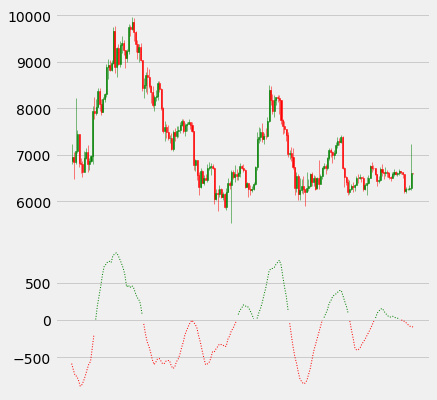

In [39]:
candle_apo(df)

In [43]:
df=sinal_apo(df,coluna=["apo_4_12","apo_8_21","apo_12_21","apo_12_40"])
df.tail(10)

,open,high,low,close,volume,apo_4_12,apo_4_21,apo_4_40,apo_8_12,apo_8_21,...,apo_rapo_12_21,apo_rapo_12_40,r_apo_apo_4_12,r_apo_sapo_4_12,r_apo_apo_8_21,r_apo_sapo_8_21,r_apo_apo_12_21,r_apo_sapo_12_21,r_apo_apo_12_40,r_apo_sapo_12_40
datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-07,6589.94,6622.49,6535.02,6601.15,1.793789e+08,15.268333,41.733690,-24.23000,-5.647917,20.817440,...,50.814078,-39.578742,817.935872,1,-19.446242,-1,50.814078,1,-39.578742,-1
2018-10-08,6601.46,6698.31,6565.01,6650.07,3.135074e+08,17.215833,40.799405,3.38825,-17.975417,5.608155,...,-10.888898,-64.991983,12.755158,1,-73.060306,-1,-10.888898,-1,-64.991983,-1
2018-10-09,6650.07,6657.00,6589.39,6631.79,2.139767e+08,21.474167,26.941310,12.29250,-8.845833,-3.378690,...,-76.818003,-33.598906,24.734982,1,-160.246028,-1,-76.818003,-1,-33.598906,-1
2018-10-10,6631.79,6633.22,6487.86,6581.07,3.236650e+08,23.782500,16.044286,21.22225,2.630000,-5.108214,...,-241.540371,-72.115629,10.749350,1,51.189176,1,-241.540371,-1,-72.115629,-1
2018-10-11,6581.07,6581.59,6171.95,6209.47,6.549241e+08,-41.280833,-67.760000,-51.84800,0.137917,-26.341250,...,242.187043,312.739641,-273.576509,-1,415.664546,1,242.187043,1,312.739641,1
2018-10-12,6209.47,6296.56,6173.86,6250.85,2.898401e+08,-110.014167,-143.221667,-125.39275,-9.907917,-43.115417,...,25.409913,45.531757,166.501807,1,63.680223,1,25.409913,1,45.531757,1
2018-10-13,6252.10,6280.73,6238.92,6267.27,1.377050e+08,-173.835000,-212.955000,-191.45325,-28.298750,-67.418750,...,17.804713,14.563543,58.011468,1,56.368082,1,17.804713,1,14.563543,1
2018-10-14,6267.27,6346.56,6247.17,6277.73,2.154229e+08,-229.025000,-268.553333,-239.98500,-46.680000,-86.208333,...,1.043797,-37.791778,31.748497,1,27.869967,1,1.043797,1,-37.791778,-1
2018-10-15,6277.73,7234.83,6244.77,6612.36,1.190524e+09,-138.310833,-169.203690,-136.94575,-55.287083,-86.179940,...,-21.846295,-112.455140,-39.608849,-1,-0.032935,-1,-21.846295,-1,-112.455140,-1
